<a href="https://colab.research.google.com/github/ajit-ai/DataScience/blob/main/fast_ai_banna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip uninstall fastai
# ! pip install -Uqq fastai
# ! pip install -q kaggle

In [ ]:
# #Uploading kaggle.json API key for kaggle
# from google.colab import files
# files.upload()

In [ ]:
# # See for example: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! rm kaggle.json
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets download moltean/fruits
# ! unzip fruits.zip
# ! rm fruits.zip

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Mar 25 03:28:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    25W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! kaggle datasets download moltean/fruits
! unzip fruits.zip

from fastai.vision.all import *
from fastai.metrics import error_rate

train_folder = '/content/fruits-360_dataset/fruits-360/Training'
dls = ImageDataLoaders.from_path_func(train_folder,
                                      get_image_files(train_folder),
                                      lambda f: os.path.basename(os.path.dirname(f)),
                                      item_tfms = Resize(224))


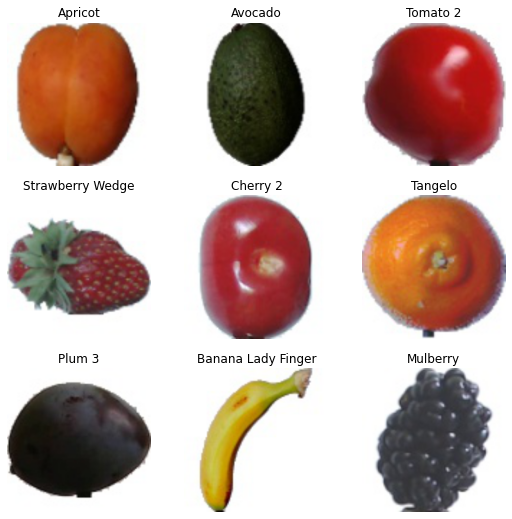

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, models.vgg19_bn, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.063546,0.005188,0.000739,07:30


epoch,train_loss,valid_loss,error_rate,time
0,0.002732,0.000917,0.000148,09:53


In [ ]:
# Getting the image from the web
from PIL import Image
import requests
from io import BytesIO

url = 'https://raw.githubusercontent.com/yoninazarathy/MathematicalEngineeringDeepLearning/master/data/banana_to_classify.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.save("test_image.jpg")


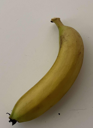

In [ ]:
img = Image.open("test_image.jpg")
img.thumbnail((128,128))
img

In [ ]:
learn.predict(Path("test_image.jpg"))

('Banana Lady Finger',
 TensorBase(17),
 TensorBase([4.8587e-08, 2.4250e-04, 1.0038e-04, 1.4874e-03, 6.8239e-06, 8.6110e-07,
         9.5964e-06, 7.6597e-07, 4.9971e-03, 1.2996e-04, 1.0477e-06, 1.2687e-06,
         2.3899e-05, 1.9750e-05, 1.8370e-05, 1.2725e-05, 2.8659e-04, 8.4605e-01,
         2.4386e-03, 3.3772e-04, 1.8727e-06, 1.6393e-06, 1.3305e-05, 1.4961e-06,
         2.3393e-05, 4.1712e-04, 8.5843e-06, 3.2918e-05, 2.1596e-06, 1.0995e-05,
         2.5409e-05, 1.1511e-04, 9.9926e-05, 2.7658e-05, 1.9428e-06, 4.2325e-06,
         1.0253e-06, 3.7775e-05, 2.0258e-04, 7.5247e-07, 1.7251e-06, 9.1321e-04,
         4.3665e-05, 8.8267e-06, 9.7258e-04, 1.5259e-05, 6.5819e-04, 1.3728e-03,
         2.5801e-04, 5.8307e-06, 1.0722e-04, 1.6029e-05, 5.5817e-08, 1.4620e-04,
         5.4944e-07, 2.1112e-05, 1.7604e-05, 1.5570e-05, 5.1265e-07, 2.1389e-08,
         2.5211e-06, 5.6068e-08, 1.9473e-05, 2.2825e-07, 7.4895e-08, 2.5268e-05,
         3.4190e-07, 1.5112e-06, 3.0372e-07, 1.4637e-05, 2.2508e-